In [1]:
import numpy as np
import pickle
from visualization import *
from run_exp import *

In [2]:
!pip install pulp
!pip install joblib
import pulp

fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3)
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3, sample="full")
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [2]:
from datetime import date
today = date.today().strftime("%m%d%y")

run = 50
it = 50
a = 30
samp = "B" # "Z"
dnew = "w" # "r"
path = "output/exp_result/sampleB_worst/" + today + "_r" + str(run) + "_it" + str(it) + "_a" + str(a) + "/"

import os
if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
from joblib import Parallel, delayed
Parallel(n_jobs=3)(delayed(run_exp)(sample=samp, iter=it, file_name= path+str(i+1), draw=dnew, alpha=a) for i in range(run))

In [3]:
# load results
n = 50
path = "output/exp_result/sampleB_worst/031220_r50_it50_a15/031220_r50_it50_a15"

results = []
for i in range(1,n+1):
    results.append(pickle.load(open(path+str(i), 'rb')))

## plot - K v.s. loglike
compare the grows of log-likelihood with K (feature-counts) for 50 iterations.


0


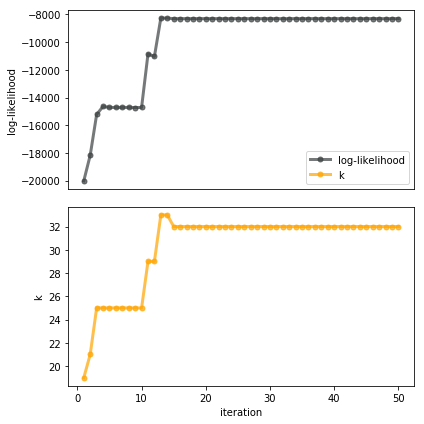

1


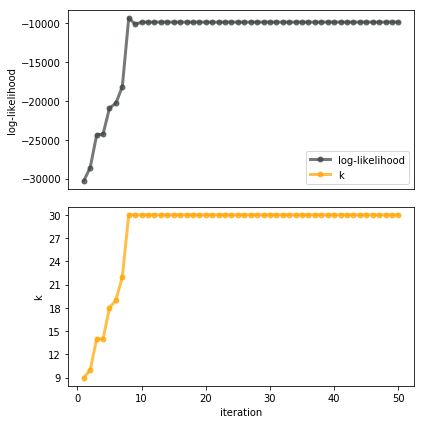

2


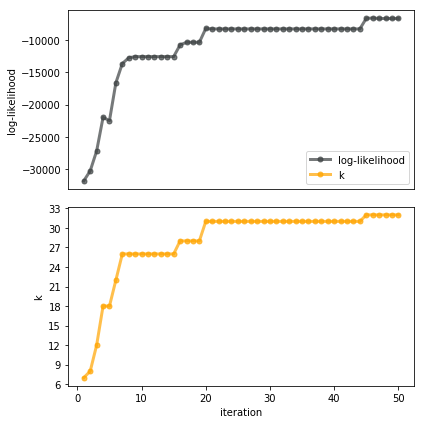

3


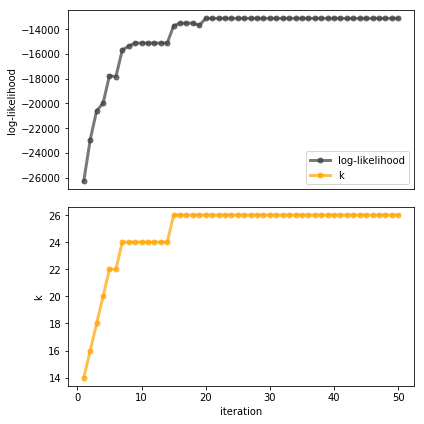

4


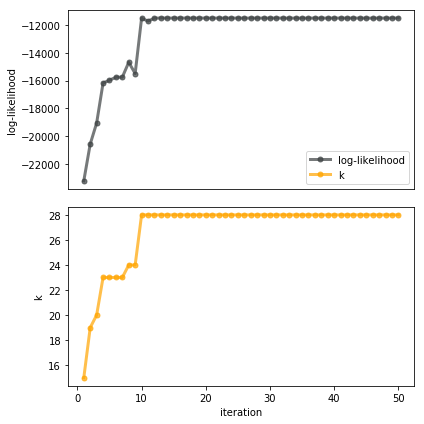

5


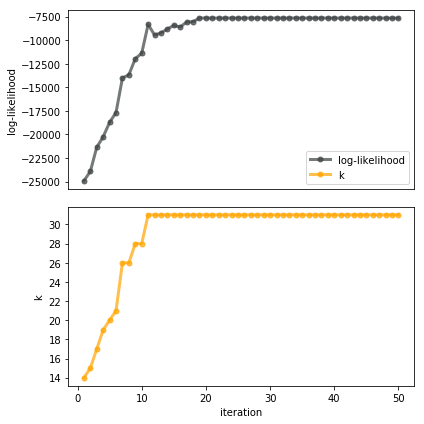

6


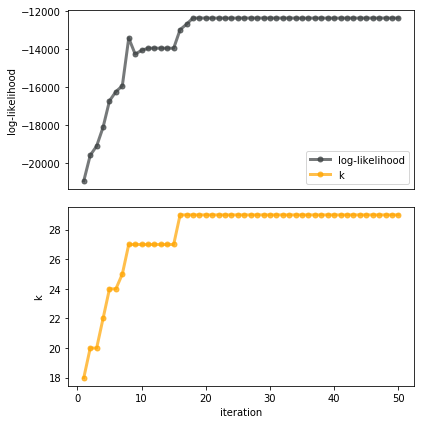

7


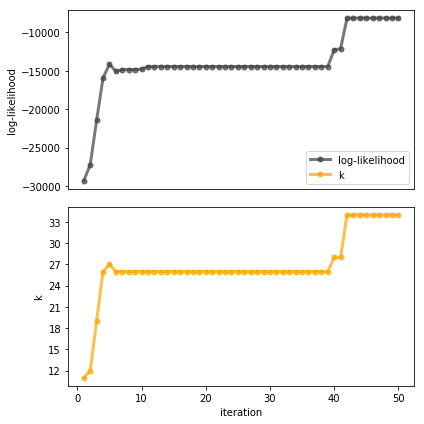

8


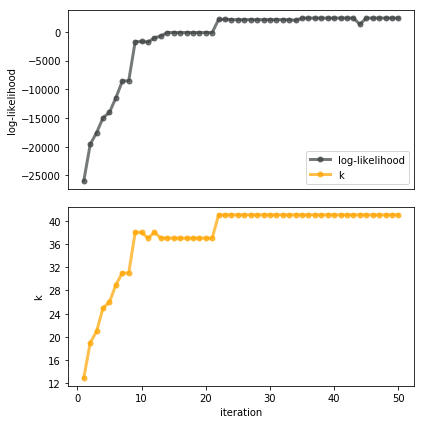

9


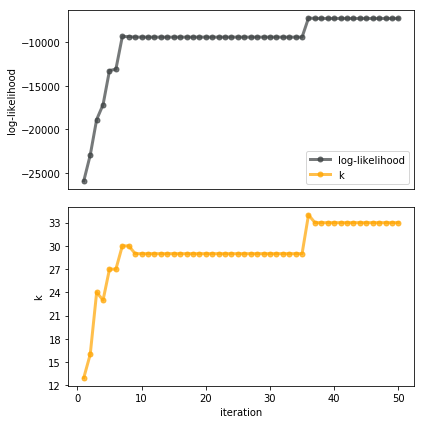

10


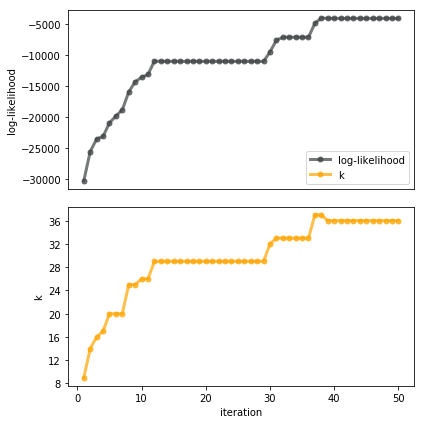

11


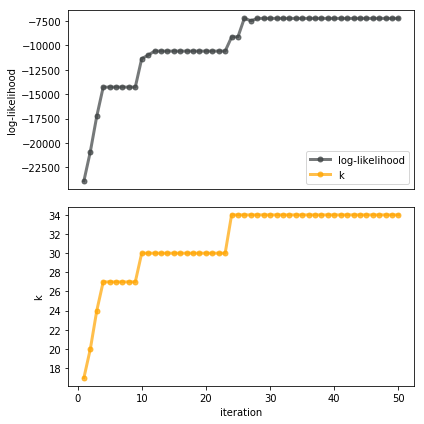

12


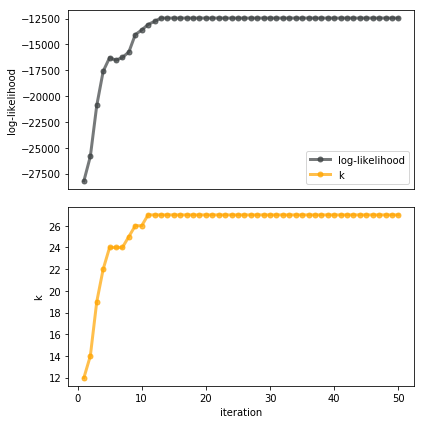

13


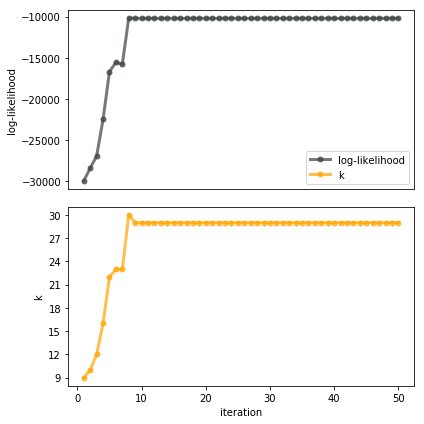

14


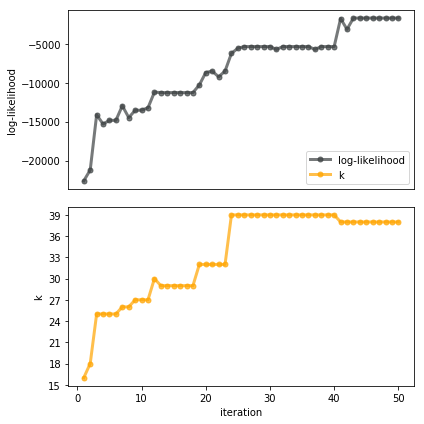

15


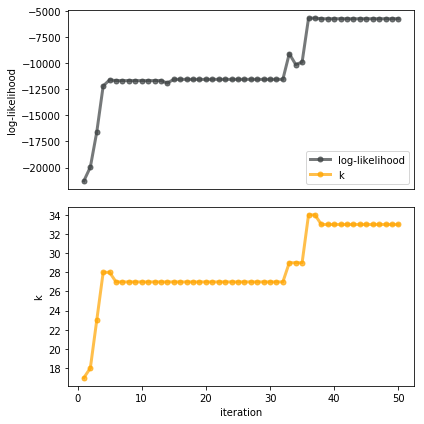

16


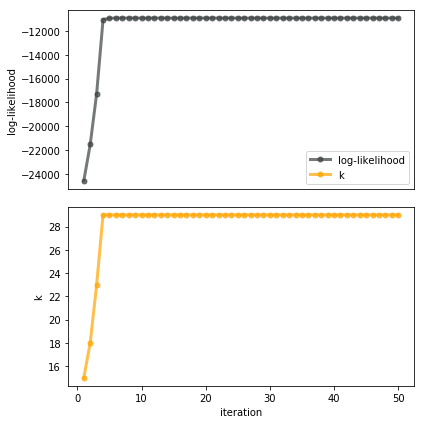

17


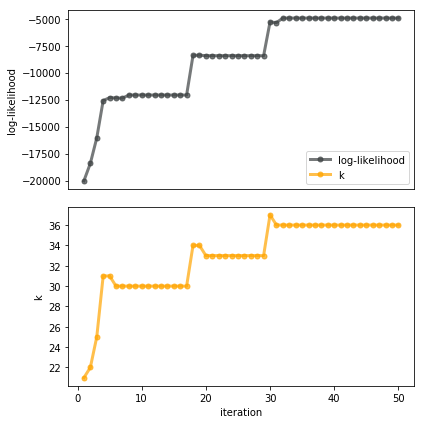

18


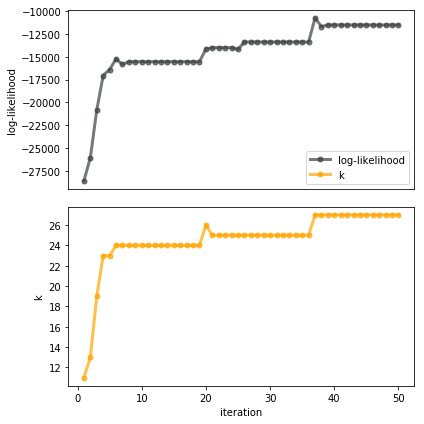

19


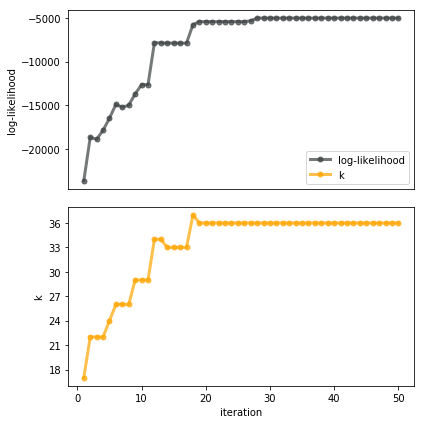

20


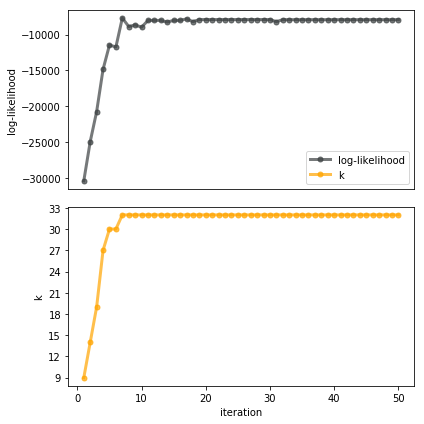

21


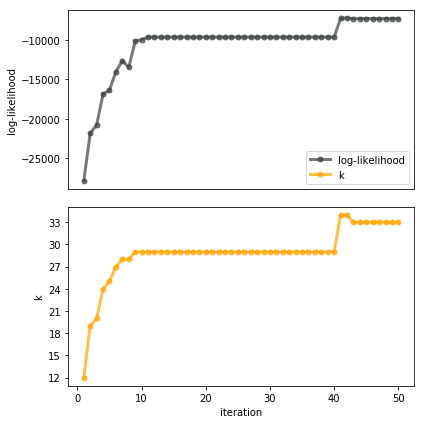

22


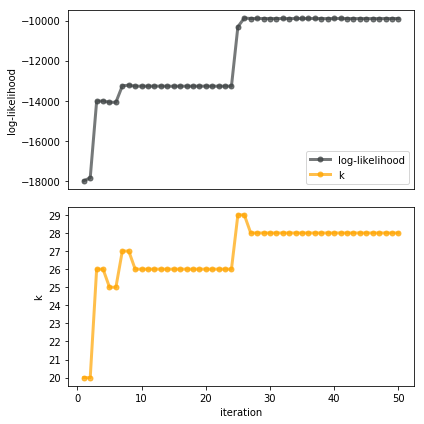

23


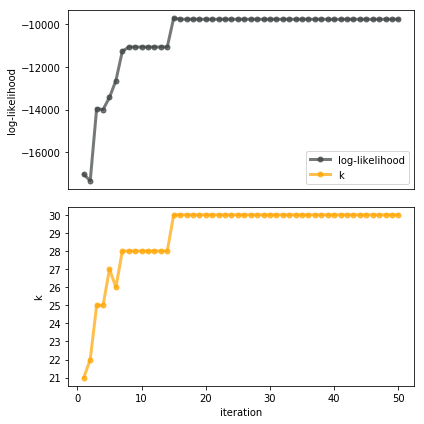

24


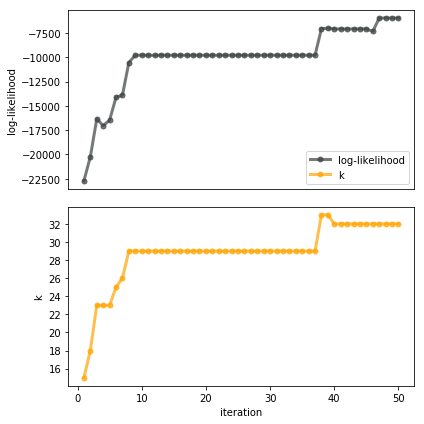

25


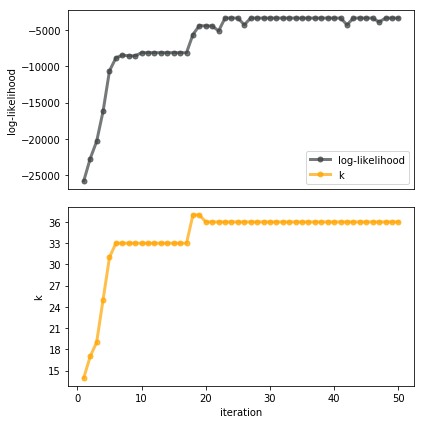

26


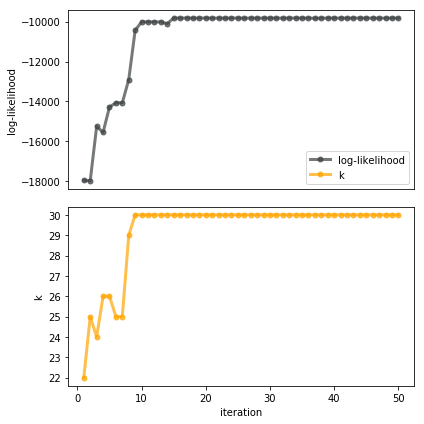

27


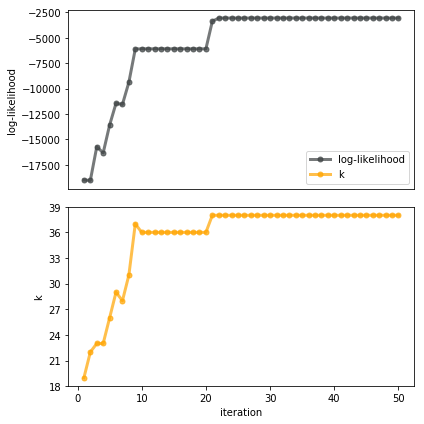

28


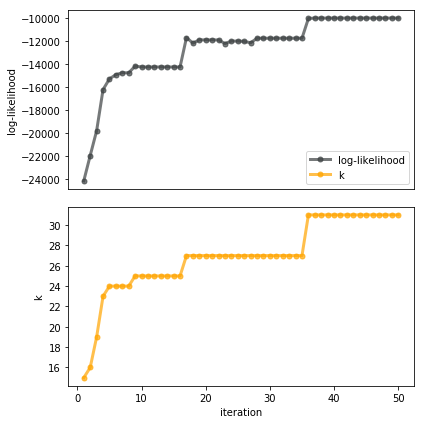

29


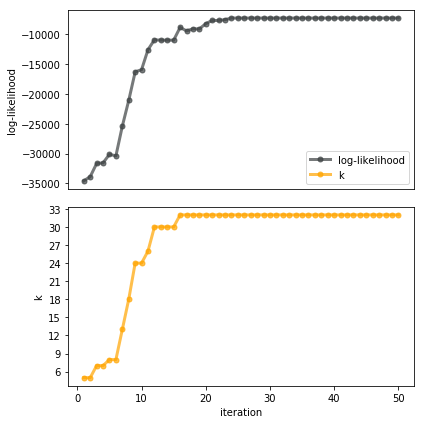

30


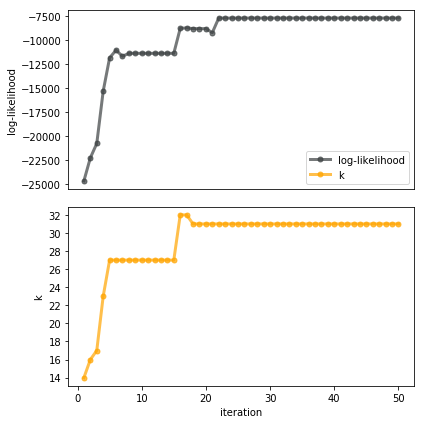

31


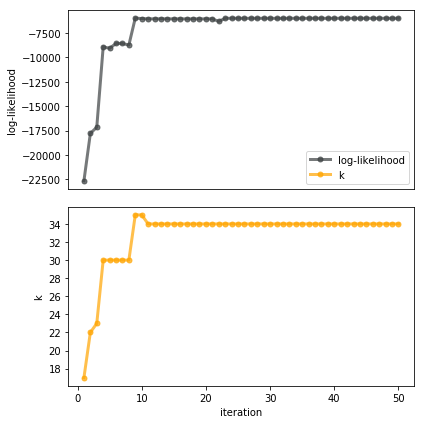

32


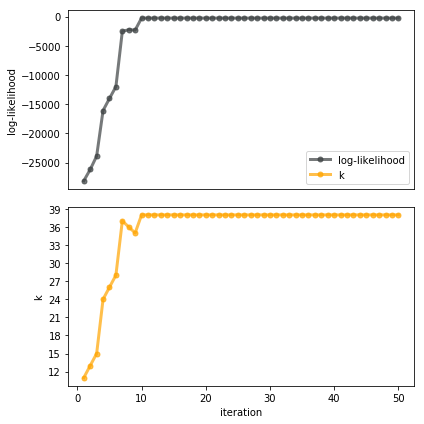

33


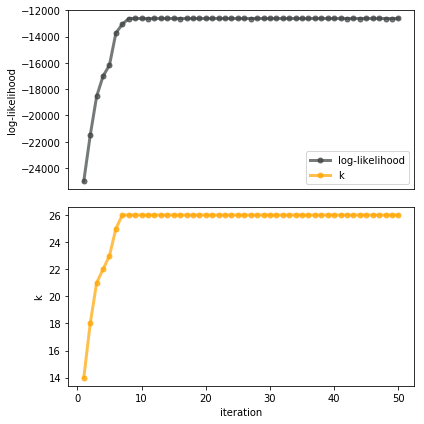

34


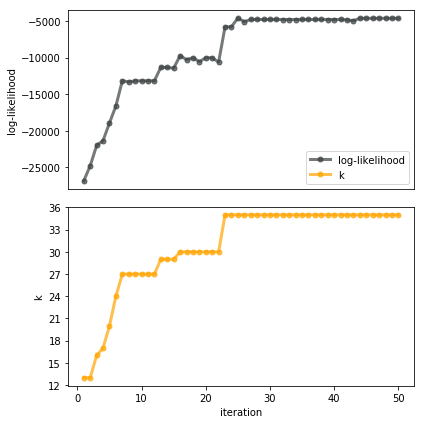

35


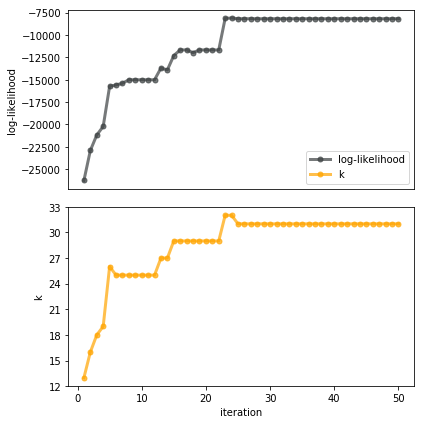

36


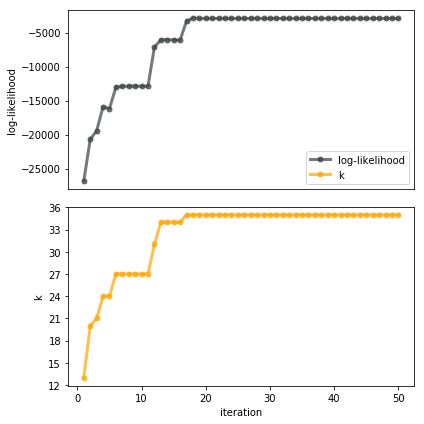

37


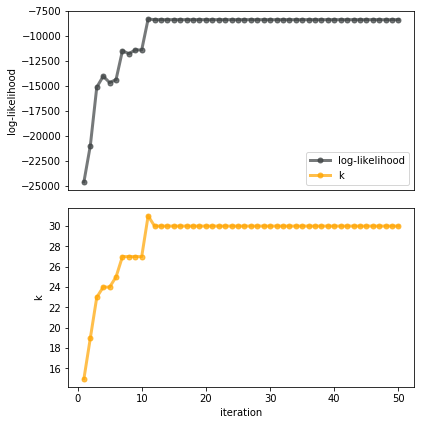

38


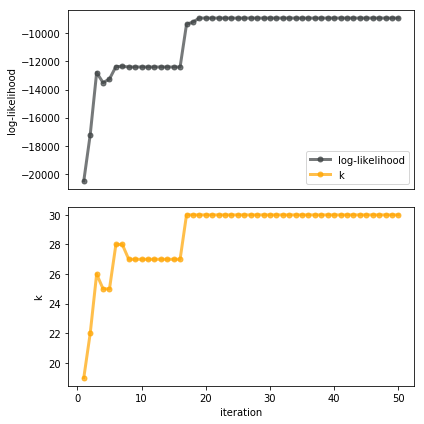

39


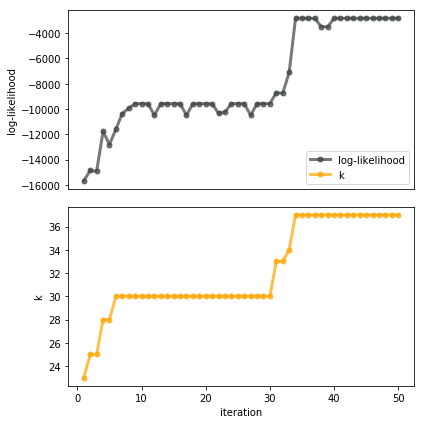

40


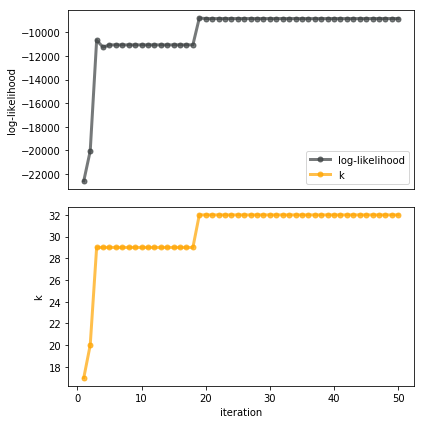

41


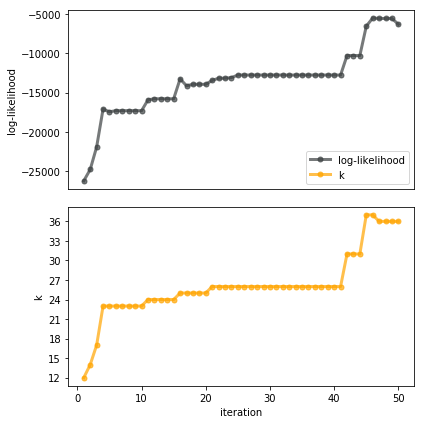

42


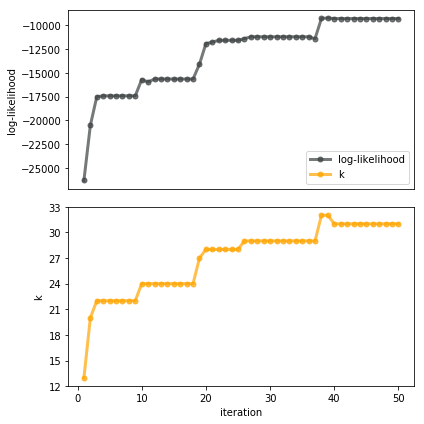

43


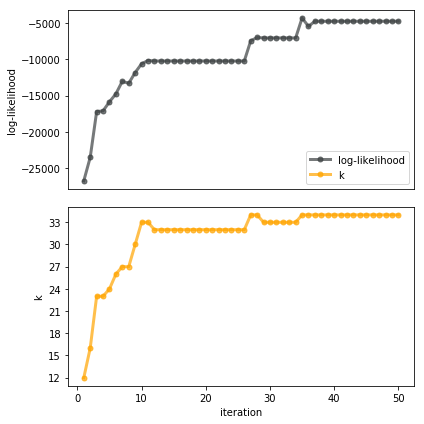

44


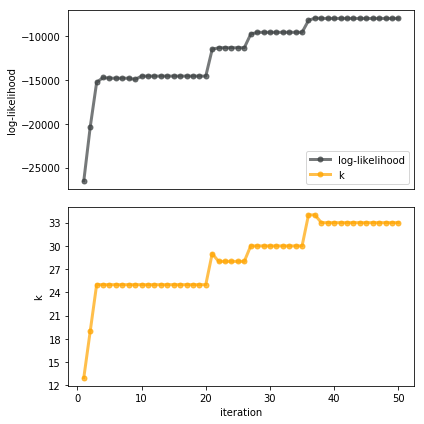

45


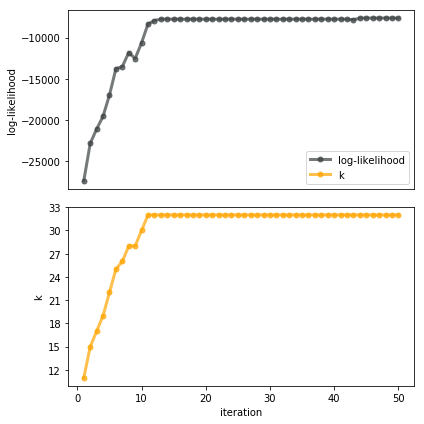

46


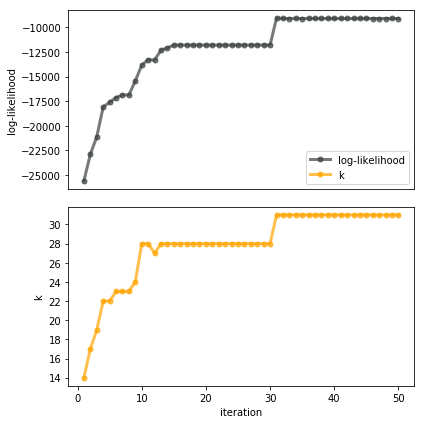

47


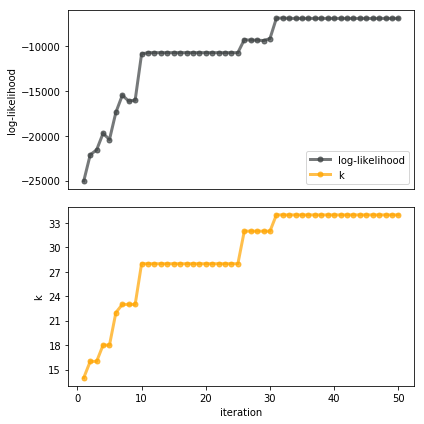

48


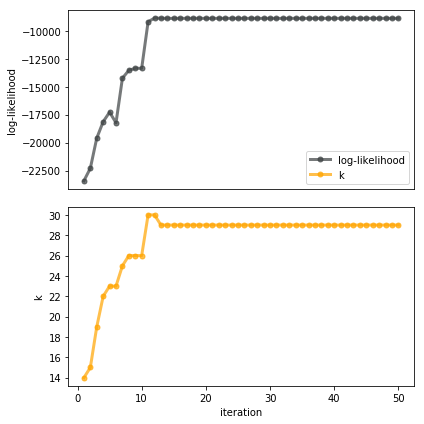

49


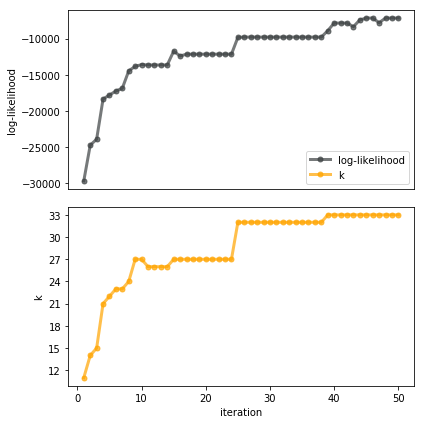

In [5]:
for i in range(n):
    print(i)
    plot_curve(results[i]['log_track'], results[i]['k_track'])

## Summarize in one plot

Take all previous results, and take the mean of all runs for each iteration.
Add std as error, to see how it differs.

In [4]:
log_all = [results[i]['log_track'] for i in range(n)]
k_all = [results[i]['k_track'] for i in range(n)]

log_mean = np.mean(log_all, axis=0)
k_mean = np.mean(k_all, axis=0)
log_std = np.std(log_all, axis=0)
k_std = np.std(k_all, axis=0)

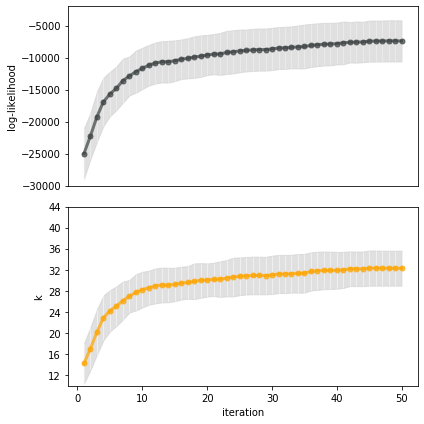

In [6]:
plot_curve(log_mean, k_mean, log_std, k_std, saveFile=True, fileName="plot-Bworst", c1_lh=[-30000,-2000], c2_lh=[10,44])

## plot log-likelihood v.s. accuracy

compare the grows of log-likelihood with accuracy for 50 iterations.

In [7]:
# loglike V.S. accuracy
log_all = [results[i]['log_track'] for i in range(n)]
acc_all = [[results[j]['accuracies'][i][0] for i in range(it)] for j in range(n)]

log_mean = np.mean(log_all, axis=0)
acc_mean = np.mean(acc_all, axis=0)
log_std = np.std(log_all, axis=0)
acc_std = np.std(acc_all, axis=0)

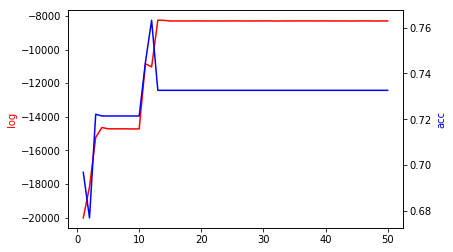

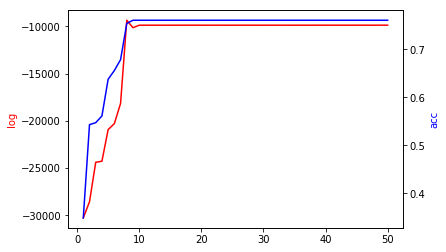

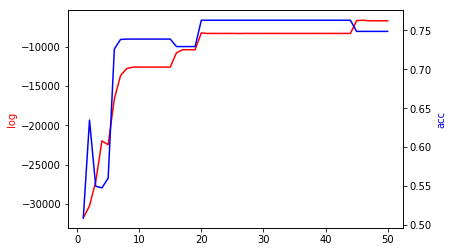

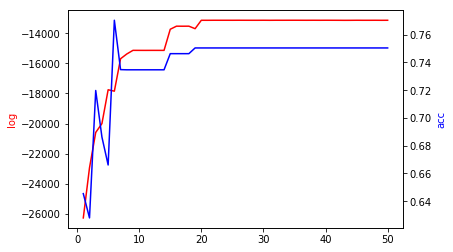

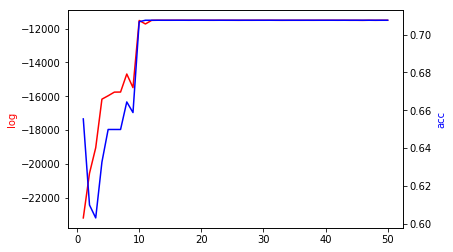

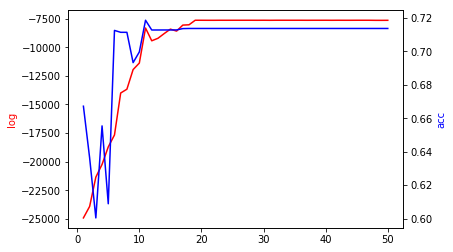

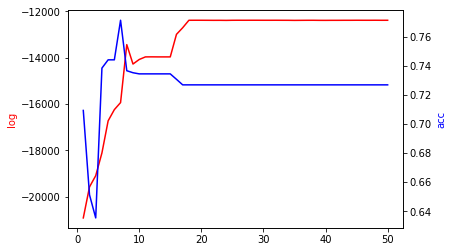

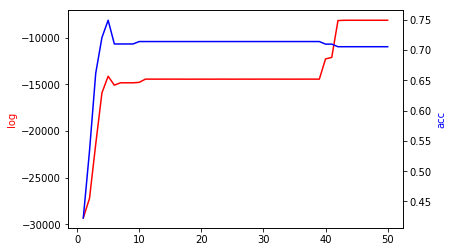

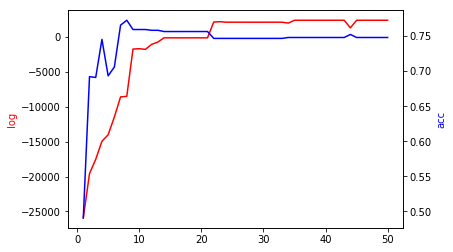

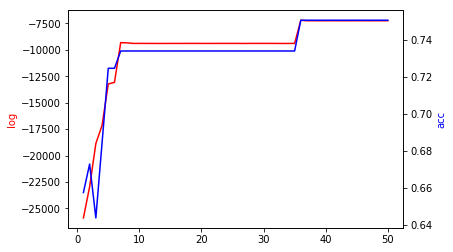

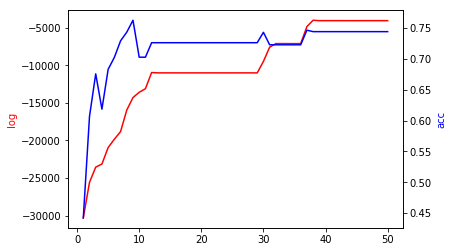

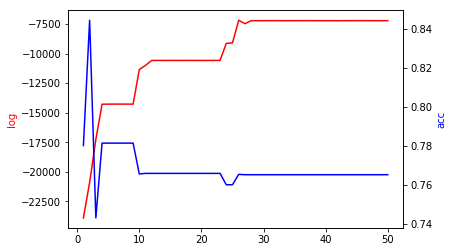

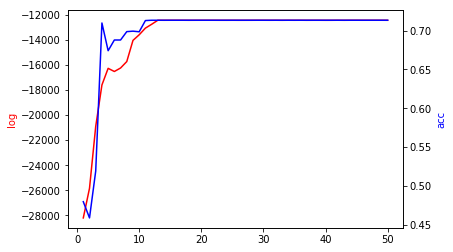

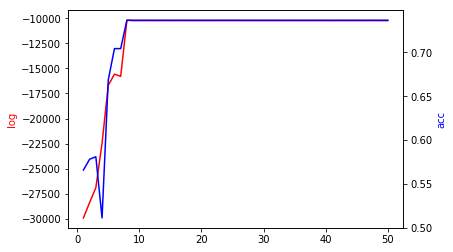

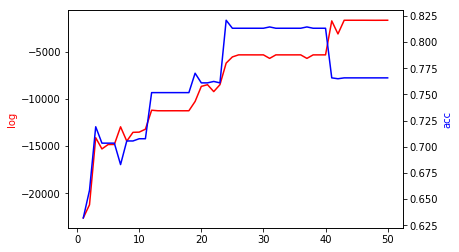

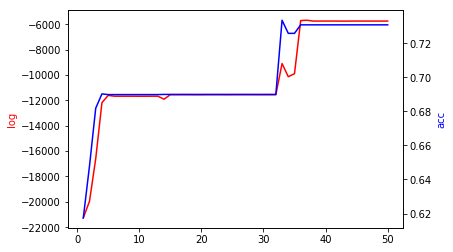

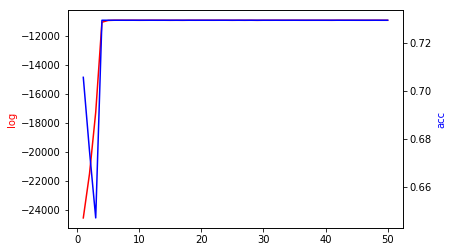

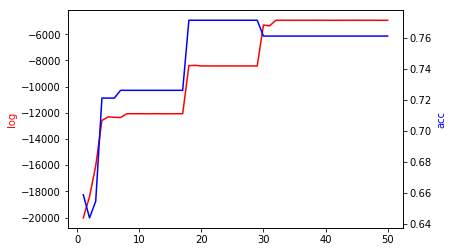

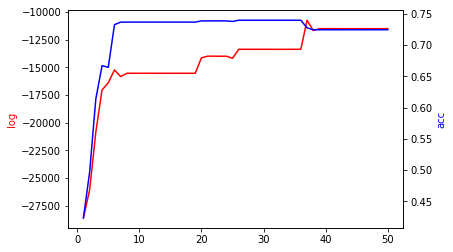

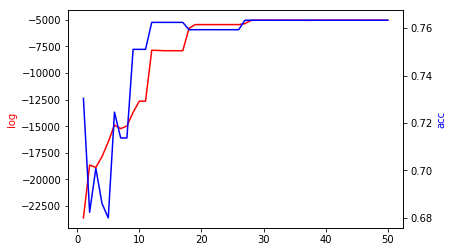

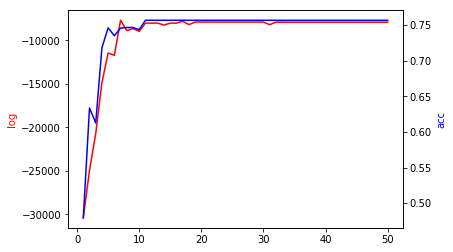

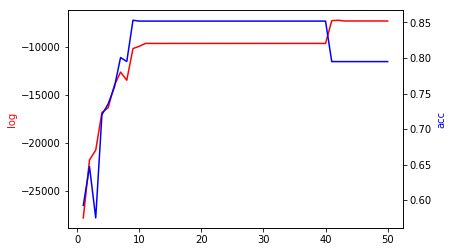

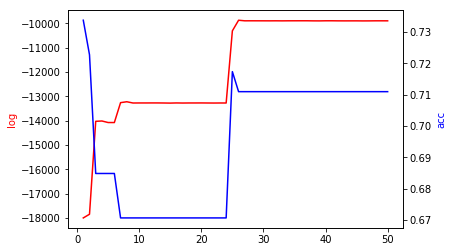

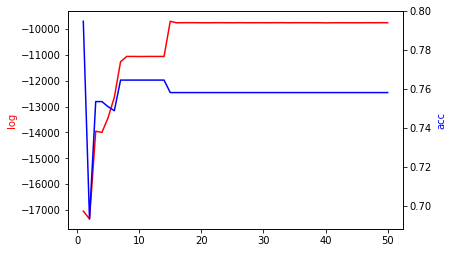

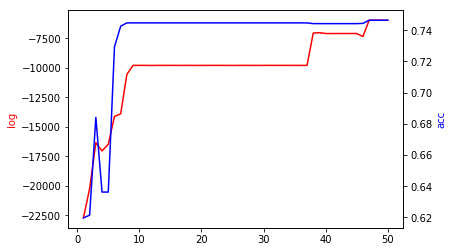

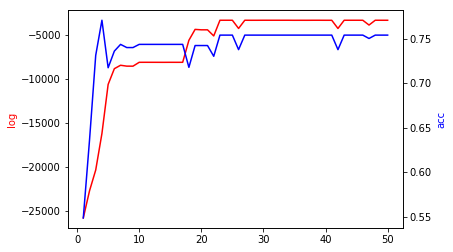

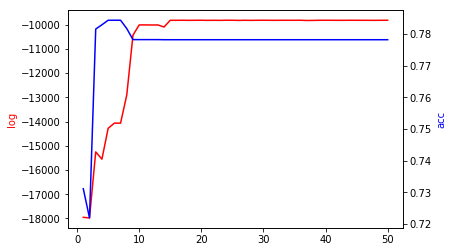

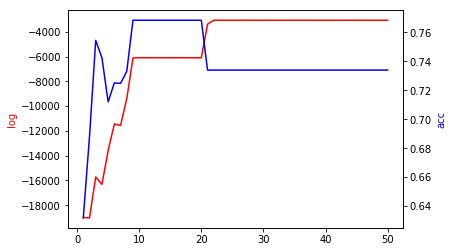

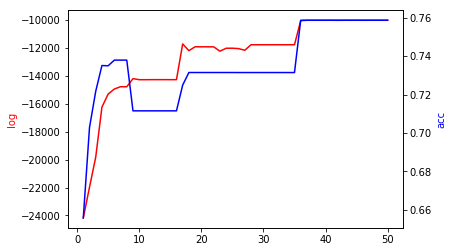

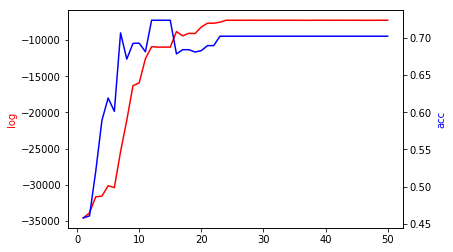

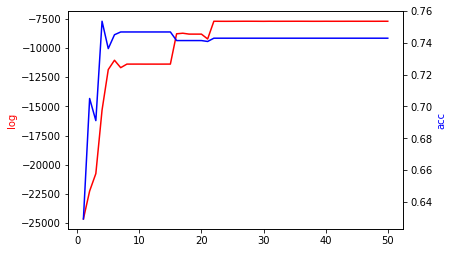

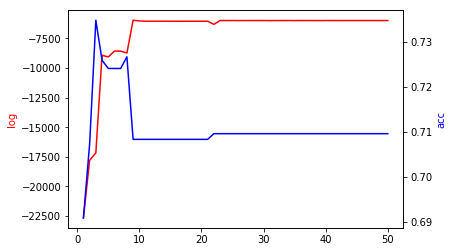

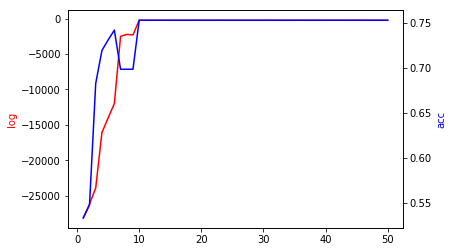

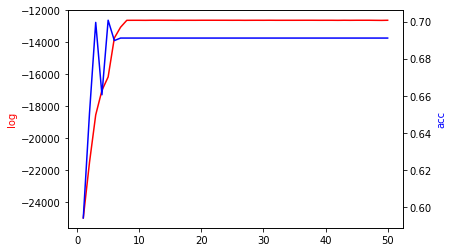

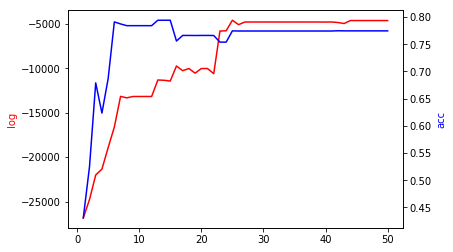

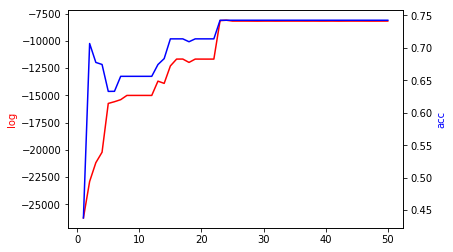

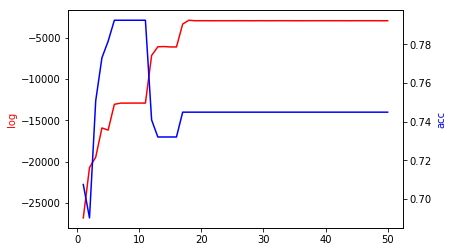

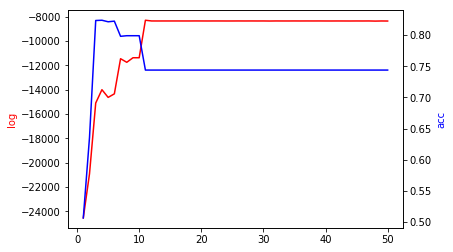

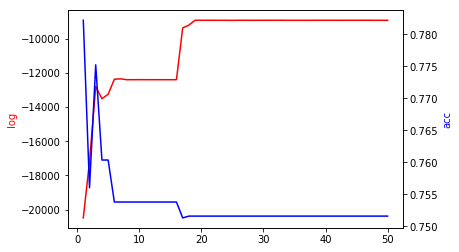

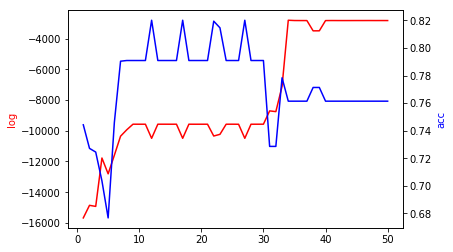

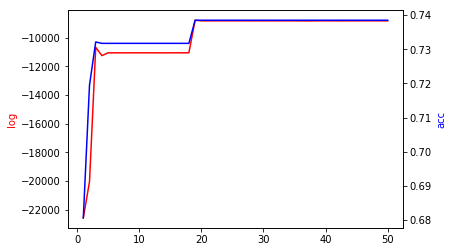

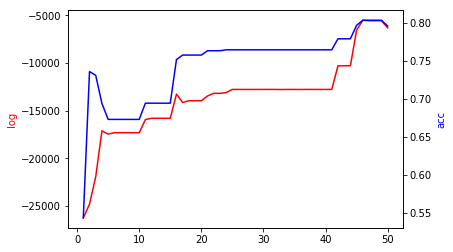

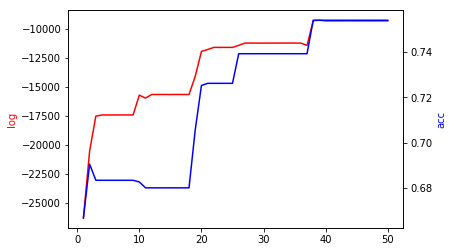

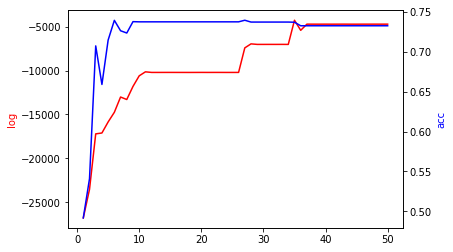

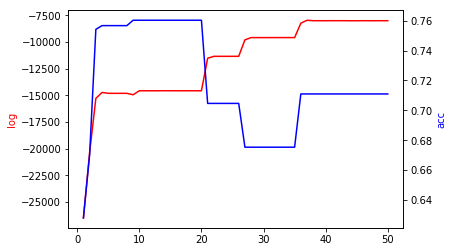

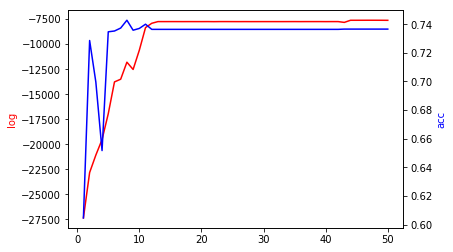

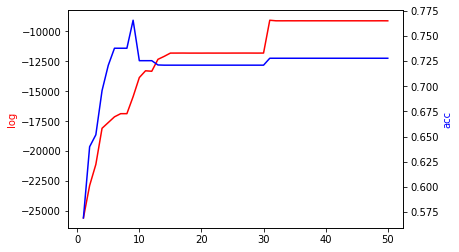

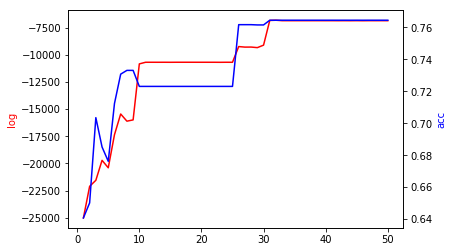

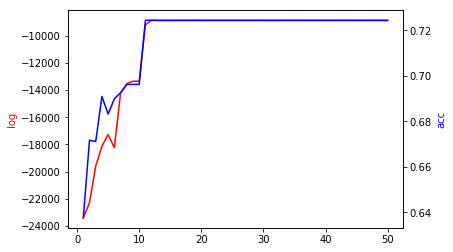

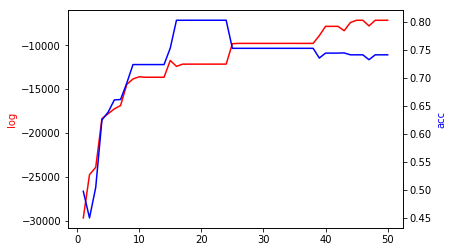

In [10]:
for i in range(n):
    index = [i for i in range(1,51)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(index, log_all[i], 'r-')
    ax1.set_ylabel('log', color='r')
    ax1.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(index, acc_all[i], 'b-')
    ax2.set_ylabel('acc', color='b')
    ax2.grid(False)

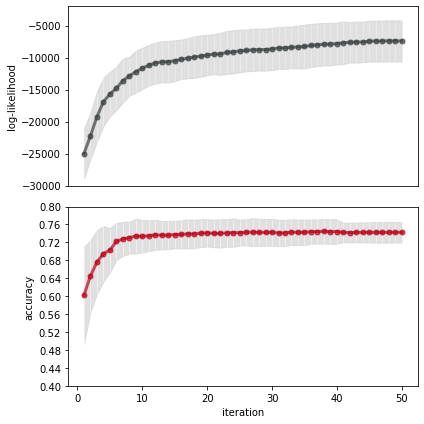

In [8]:
plot_curve2(log_mean, acc_mean, log_std, acc_std, saveFile=True, fileName="plot-Bworst_acc", c1_lh=[-30000,-2000], c2_lh=[0.4,0.8])

In [12]:
print([results[i]['best_model']['best_iter'] for i in range(n)])
[results[i]['best_model']['best_accuracies'] for i in range(n)]

[11, 8, 19, 5, 10, 10, 6, 4, 7, 35, 8, 1, 11, 7, 23, 32, 3, 17, 25, 26, 16, 8, 0, 0, 46, 3, 4, 8, 35, 11, 3, 2, 9, 2, 12, 22, 5, 3, 0, 11, 18, 45, 37, 5, 8, 7, 8, 30, 10, 15]


[(0.7632333333333333, 0.7594),
 (0.7603333333333333, 0.7575),
 (0.7630666666666667, 0.7602),
 (0.7704, 0.7771),
 (0.7076, 0.6987),
 (0.7185666666666667, 0.7173),
 (0.7712166666666667, 0.7732),
 (0.7491333333333333, 0.7469),
 (0.7724666666666666, 0.7771),
 (0.7506333333333334, 0.7493),
 (0.7626166666666667, 0.766),
 (0.8443833333333334, 0.8442),
 (0.71335, 0.7141),
 (0.7365166666666667, 0.7339),
 (0.8209333333333333, 0.8157),
 (0.7335166666666667, 0.7293),
 (0.72955, 0.7274),
 (0.7712, 0.7652),
 (0.7397166666666667, 0.7412),
 (0.7632833333333333, 0.7634),
 (0.75655, 0.7542),
 (0.8531333333333333, 0.8525),
 (0.7337, 0.7398),
 (0.7946833333333333, 0.7903),
 (0.7464166666666666, 0.7468),
 (0.7706, 0.7756),
 (0.7843333333333333, 0.7861),
 (0.7682833333333333, 0.7643),
 (0.7586333333333334, 0.7549),
 (0.7235, 0.7193),
 (0.7535166666666666, 0.7541),
 (0.7348666666666667, 0.7268),
 (0.7530666666666667, 0.7474),
 (0.6996, 0.7056),
 (0.7941333333333334, 0.7965),
 (0.74265, 0.7391),
 (0.792466666

In [6]:
all_best = [results[i]['best_model']['best_accuracies'][0] for i in range(n)]
all_iter = [results[i]['best_model']['best_iter'] for i in range(n)]
all_k = [results[i]['best_model']['best_k'] for i in range(n)]
best = np.argmax(all_best)
best_result = results[best]['best_model']
best_it = best_result['best_iter']
best_acc = best_result['best_accuracies'][0]
best_features = best_result['best_features']
best_k = best_result['best_k']


In [7]:
print("The best result is in run {}, iteration {}, with accuracy {} (K = {})".format(best, best_it, best_acc, best_k))
print("avg acc: {}".format(np.mean(all_best)))
print("avg iter: {}".format(np.mean(all_iter)))
print("avg k: {}".format(np.mean(all_k)))

The best result is in run 21, iteration 8, with accuracy 0.8531333333333333 (K = 29)
avg acc: 0.7624703333333333
avg iter: 13.02
avg k: 28.52


## plot best features

[5, 3, 2, 5, 3, 3, 4, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1]


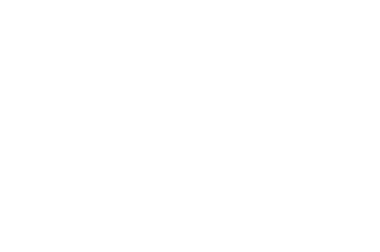

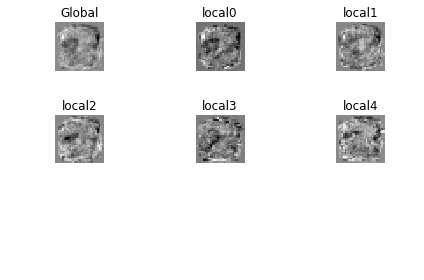

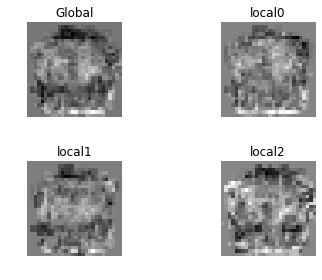

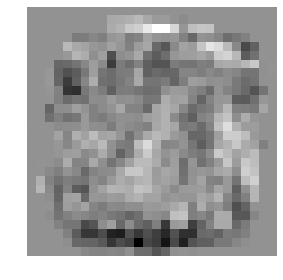

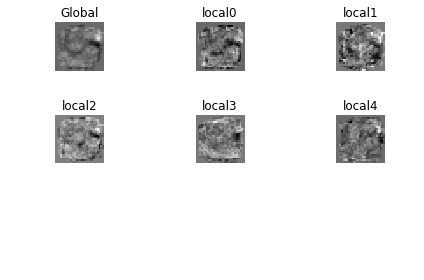

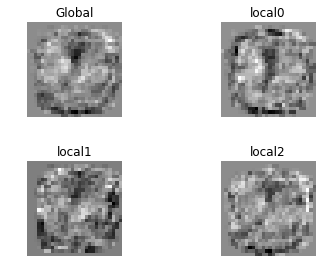

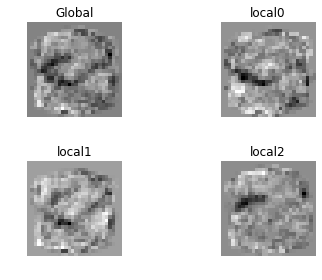

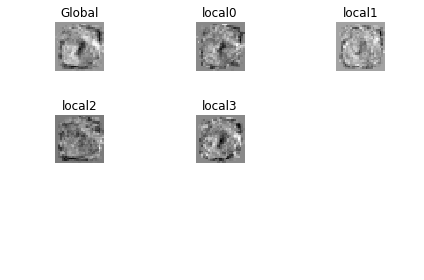

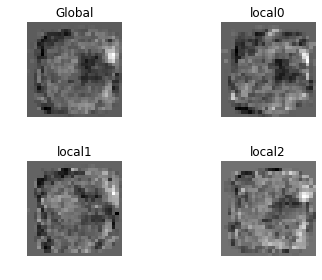

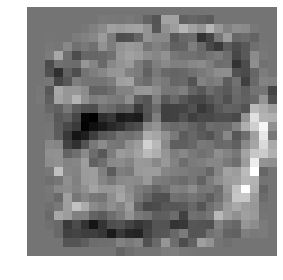

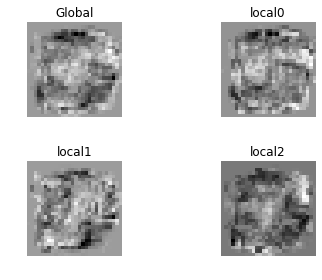

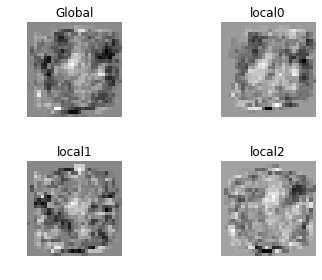

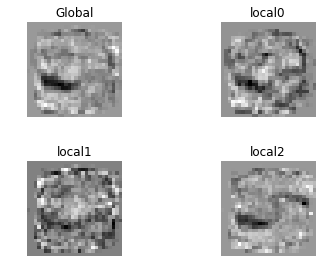

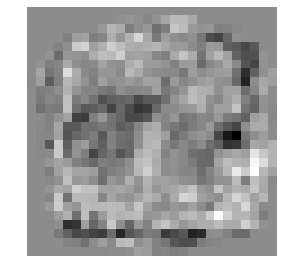

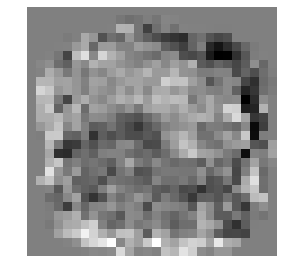

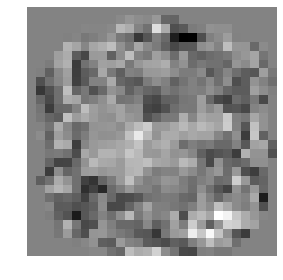

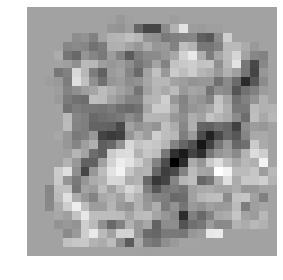

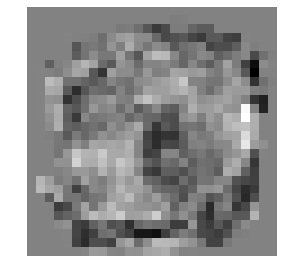

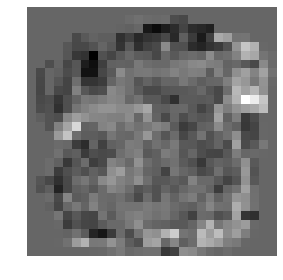

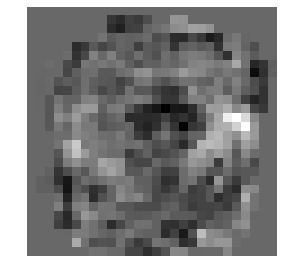

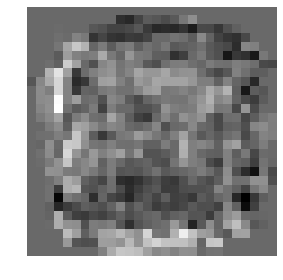

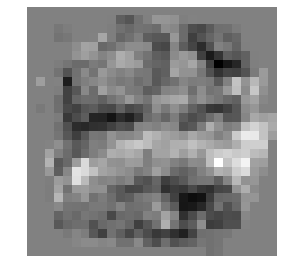

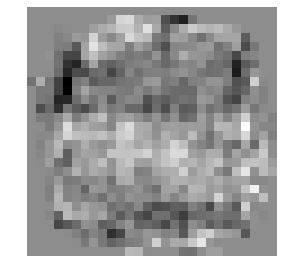

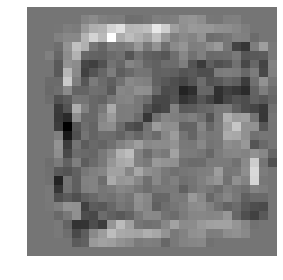

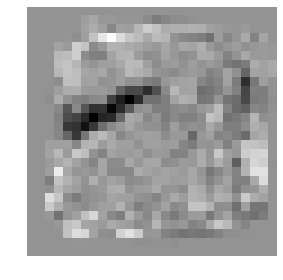

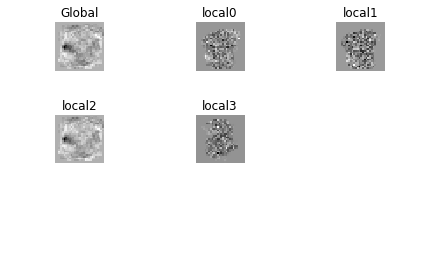

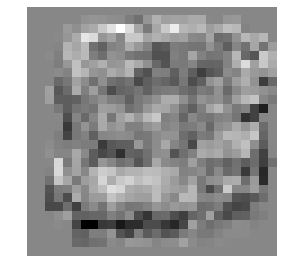

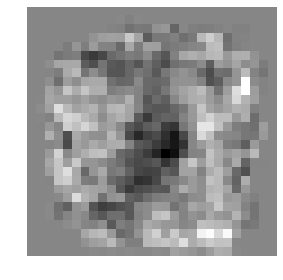

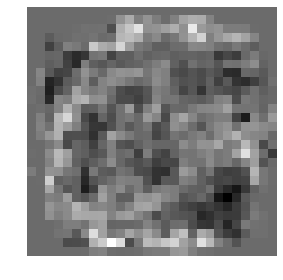

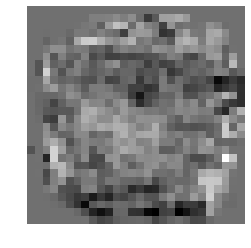

In [17]:
print(best_result['best_dist'])
prep_features = prep_group(best_features)
plot_all(prep_features)